https://www.youtube.com/watch?v=n-8oCPjpEvM

font: https://www.vietrick.com/font-chu-tieng-viet-dep-tren-google-fonts/

In [1]:
import cv2
import easyocr
import matplotlib.pyplot as plt

In [2]:
# read image
img = 's1.jpg'
image_path = rf'D:\OneDrive - codemely\Proj1_NhanDienBienBaoTenDuong_CODEMELY\code\roadapp\test_data\{img}'
image_path = r'D:\OneDrive - codemely\Proj1_NhanDienBienBaoTenDuong_CODEMELY\code\roadapp\test_data\cropped_imgs\cropped_image_0.8963.jpg'
image_path = r'D:\OneDrive - codemely\Proj1_NhanDienBienBaoTenDuong_CODEMELY\code\roadapp\test_data\cropped_imgs\cropped_image_0.9320.jpg'
# image_path = r'D:\OneDrive - codemely\Proj1_NhanDienBienBaoTenDuong_CODEMELY\code\roadapp\test_data\s1.jpg'

image = cv2.imread(image_path)

In [3]:
# instance text detector 
reader = easyocr.Reader(['vi'], gpu=False)



Using CPU. Note: This module is much faster with a GPU.


In [8]:
# detect text on image 
text_ = reader.readtext(image)
print(text_)
# [([[27, 57], [195, 57], [195, 149], [27, 149]], 'BÀ TRIỆU]', 0.22663561148346503), ([[87.61074257670562, 28.249004957105186], [153.29285114366124, 22.72906817678536], [155.38925742329437, 62.750995042894814], [88.70714885633878, 67.27093182321464]], 'PHỐ', 0.8071149566463238)]
# Output là tọa độ 4 góc, tên, độ tin cậy, khá giống các file label.txt

[([[27, 57], [195, 57], [195, 149], [27, 149]], 'BÀ TRIỆU]', 0.22663561148346503), ([[87.61074257670562, 28.249004957105186], [153.29285114366124, 22.72906817678536], [155.38925742329437, 62.750995042894814], [88.70714885633878, 67.27093182321464]], 'PHỐ', 0.8071149566463238)]


In [12]:
# detect text on image 
text_ = reader.readtext(image)
extracted_text = []   # Initialize an empty list to store the extracted text

# Iterate over the output of the readtext function
for item in text_:
    text = item[1]
    extracted_text.append(text)
print(extracted_text)
text = ' '.join(extracted_text)
print(text)

['BÀ TRIỆU]', 'PHỐ']
BÀ TRIỆU] PHỐ


In [16]:

# Function for OCR processing
def easyocr_from_image(img_path):
    image = cv2.imread(image_path)
    text_ = reader.readtext(image)

    extracted_text = []     # Initialize an empty list to store the extracted text
    # Iterate over the output of the readtext function
    for item in text_:
        text = item[1]
        extracted_text.append(text)
    text = ' '.join(extracted_text)
    
    return text

In [20]:
import csv, os

output_csv = r"D:\OneDrive - codemely\Proj1_NhanDienBienBaoTenDuong_CODEMELY\mycode\ResearchModel\DATA_TestResearch\TEST_paddle_results.csv"
image_folder = r"D:\OneDrive - codemely\Proj1_NhanDienBienBaoTenDuong_CODEMELY\mycode\ResearchModel\DATA_TestResearch\crop_sign_test_imgs"

# Mở file CSV để ghi
with open(output_csv, mode='a', newline='', encoding='utf-8') as file:  # Chú ý xem file có đang mở ko, đang mở ko thao tác được
    writer = csv.writer(file) 

    # Ghi tiêu đề cho cột trong CSV
    writer.writerow(['Image Name', 'OCR Result'])

    # Duyệt qua tất cả các file trong thư mục
    for image_name in os.listdir(image_folder):
        
        if image_name.lower().endswith(('.png', '.jpg')):
            print(f"START DETECT&REG {image_name} img")

            # Đường dẫn đầy tủ image_path, prepare for detect_and_ocr def()
            image_path = os.path.join(image_folder, image_name)

            # Thực hiện DETECT FRAME - OCR FRAME: tham số yolo_model và image_path
            # all_recognized_text_list = detect_and_ocr(yolo_model, image_path)
            all_recognized_text_list = easyocr_from_image(image_path)
            # # Kiểm tra xem all_recognized_text_list có phải là một iterable không trước khi join
            # if isinstance(all_recognized_text_list, list):
            #     all_recognized_text_str = ', '.join(all_recognized_text_list)
            # else:
            #     # Xử lý trường hợp all_recognized_text_list không phải là một list
            #     # Có thể là ghi log, ném exception, hoặc một hành động thay thế nào đó
            #     print("all_recognized_text_list không phải là một list.")
            #     all_recognized_text_str = ''  # Hoặc một giá trị thay thế nào đó
            all_recognized_text_str = all_recognized_text_list
            print(all_recognized_text_str)
            # Ghi kết quả vào file CSV
            writer.writerow([image_name, all_recognized_text_str])

            print(f"Save successfully DETECT&RECOG of {image_name} into .csv : {image_name, all_recognized_text_str}")
            print("-----------------------------------------------")

print(f"All images processed. Results saved to {output_csv}")


START DETECT&REG cropped_image_0.3089.jpg img

Save successfully DETECT&RECOG of cropped_image_0.3089.jpg into .csv : ('cropped_image_0.3089.jpg', '')
-----------------------------------------------
START DETECT&REG cropped_image_0.8504.jpg img
PMo [ingú
Save successfully DETECT&RECOG of cropped_image_0.8504.jpg into .csv : ('cropped_image_0.8504.jpg', 'PMo [ingú')
-----------------------------------------------
START DETECT&REG cropped_image_0.8831.jpg img
PHõ GÂl CẨu
Save successfully DETECT&RECOG of cropped_image_0.8831.jpg into .csv : ('cropped_image_0.8831.jpg', 'PHõ GÂl CẨu')
-----------------------------------------------
START DETECT&REG cropped_image_0.8963.jpg img
Pho KAI BÀ IRUNG]
Save successfully DETECT&RECOG of cropped_image_0.8963.jpg into .csv : ('cropped_image_0.8963.jpg', 'Pho KAI BÀ IRUNG]')
-----------------------------------------------
START DETECT&REG cropped_image_0.9137.jpg img
IÍnalQu riT Deu 7a
Save successfully DETECT&RECOG of cropped_image_0.9137.jpg into .

In [ ]:
# draw bbox and text:
threshold = 0.25 # best trong quá trình thử nghiệm

# Initialize text_list outside the loop
text_list = [t[1] for t in text_ if t[2] > 0]

# Join the strings directly using ' '.join()
text_combined = ' '.join(text_list)

print(text_combined)


BÀ TRIỆU] PHỐ


In [ ]:
# draw bbox and text:
threshold = 0.25 # best trong quá trình thử nghiệm

# Initialize text_list outside the loop
text_list = [t[1] for t in text_ if t[2] > threshold]

# Join the strings directly using ' '.join()
text_combined = ' '.join(text_list)

print(text_combined)


Pho


([[88, 16], [162, 16], [162, 48], [88, 48]], 'Pho', 0.6792097982145774)
([[8, 60], [214, 60], [214, 132], [8, 132]], 'KAI BÀ IRUNG]', 0.12378965532456308)


<function matplotlib.pyplot.show(close=None, block=None)>

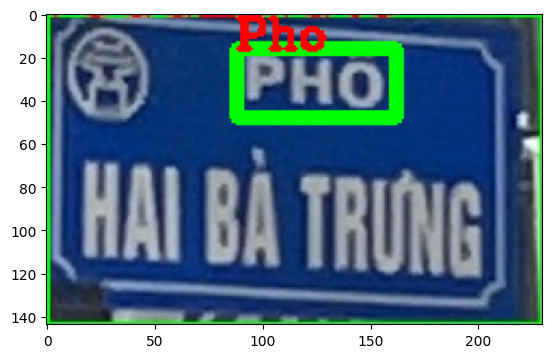

In [ ]:
# draw bbox and text:
threshold = 0.25 # best trong quá trình thử nghiệm

for t in text_:
    print(t)

    bbox, text, score = t

    if score > threshold:
        cv2.rectangle(image, bbox[0], bbox[2], color=(0, 255, 0), thickness=5) # Vẽ khung
        cv2.putText(image, text, org=bbox[0], fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.65, color=(0, 0, 255), thickness=2) # Hiển thị chữ

        # Thêm hiển thị score bên cạnh khung
        score_text = str(round(score, 4))
        score_org = (bbox[0][0] + 150, bbox[0][1]) # Vị trí của chữ score
        cv2.putText(image, score_text, org=score_org, fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.65, color=(0, 0, 255), thickness=2)

# plt.imshow(image) # ra mau xanh nuoc birn (0, 255, 0)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show

img10.jfif: Suong ĐUONG Troma KHỎI  donG

- Data tốt: 90% xử lý data. 
- Model OCR nào tốt nhất, bước đầu. 
- Sản phẩm đầu tiên của team AI - CodeMely, github 
- Thử những cái mới. 

# Train model custom data

https://github.com/JaidedAI/EasyOCR/blob/master/trainer/trainer.ipynb